In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('election2024 (1).csv')
df.head(3)

,id,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,job_type,company_type,weight1
0,07169ed8148ce047,male,18.0,north caucasian,village,named correct date,not sure,Putin,several times a week,over 4 hours a day,incomplete school education,very high,entrepreneur,NaN,farming,1.445172
1,0716a4f3354cecdd,male,23.0,north caucasian,village,named correct date,not sure,Putin,once half a year,over 4 hours a day,college,very high,work for hire,commercial organization,trade,1.445172
2,0716889b304ce79c,male,20.0,volga,city with population of less than 50k,named correct date,definitely yes,Putin,several times a week,over 4 hours a day,college,very high,work for hire,law enforcement agency,law enforcement agency,1.301691


In [ ]:
df.shape

(1600, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1600 non-null   object 
 1   sex                  1600 non-null   object 
 2   age                  1600 non-null   float64
 3   federal_district     1600 non-null   object 
 4   type_of_city         1600 non-null   object 
 5   knows_election_date  1600 non-null   object 
 6   will_vote            1600 non-null   object 
 7   candidate            1600 non-null   object 
 8   television_usage     1600 non-null   object 
 9   internet_usage       1600 non-null   object 
 10  education            1600 non-null   object 
 11  income               1600 non-null   object 
 12  employment           1600 non-null   object 
 13  job_type             692 non-null    object 
 14  company_type         879 non-null    object 
 15  weight1              1600 non-null   f

In [ ]:
df.drop('id', axis = 1, inplace = True)

**Check for Missing Values**

In [ ]:
df.isnull().sum()

,0
sex,0
age,0
federal_district,0
type_of_city,0
knows_election_date,0
will_vote,0
candidate,0
television_usage,0
internet_usage,0
education,0


In [ ]:
df['job_type']

,job_type
0,NaN
1,commercial organization
2,law enforcement agency
3,NaN
4,commercial organization
...,...
1595,NaN
1596,NaN
1597,NaN
1598,commercial organization


In [ ]:
mode_value = df['job_type'].mode()[0]
df['job_type'].fillna(mode_value, inplace=True)

In [ ]:
df.company_type

,company_type
0,farming
1,trade
2,law enforcement agency
3,NaN
4,"tech, programming, communications"
...,...
1595,NaN
1596,NaN
1597,NaN
1598,"industry, manufacturing"


In [ ]:
mode_values = df['company_type'].mode()[0]
df['company_type'].fillna(mode_values,inplace=True )

In [ ]:
df.duplicated().sum()


0

In [ ]:
df.head()

,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,job_type,company_type,weight1
0,male,18.0,north caucasian,village,named correct date,not sure,Putin,several times a week,over 4 hours a day,incomplete school education,very high,entrepreneur,commercial organization,farming,1.445172
1,male,23.0,north caucasian,village,named correct date,not sure,Putin,once half a year,over 4 hours a day,college,very high,work for hire,commercial organization,trade,1.445172
2,male,20.0,volga,city with population of less than 50k,named correct date,definitely yes,Putin,several times a week,over 4 hours a day,college,very high,work for hire,law enforcement agency,law enforcement agency,1.301691
3,male,22.0,northwestern,city with population of 1 million and higher,not sure or no answer,not sure,Davankov,several times a week,over 4 hours a day,college,very high,unemployed,commercial organization,"industry, manufacturing",1.538628
4,male,21.0,southern,city with population of 1 million and higher,named correct date,definitely yes,Putin,does not watch,over 4 hours a day,bachelor degree,very high,employed student,commercial organization,"tech, programming, communications",1.967015


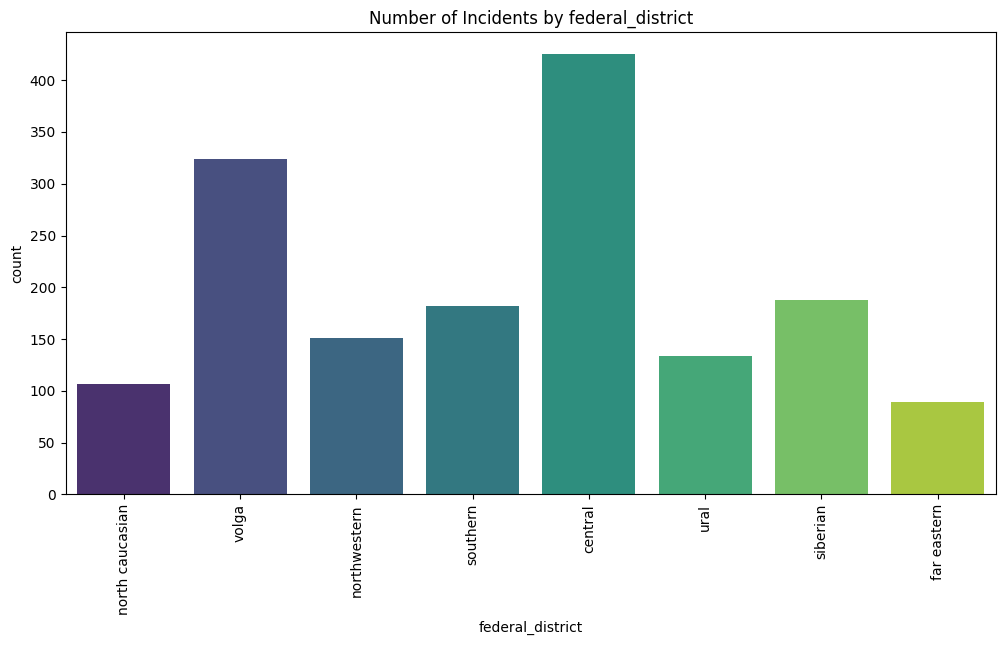

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='federal_district', data=df, palette='viridis')
plt.xticks(rotation=90)
plt.title('Number of Incidents by federal_district')
plt.show()

<Axes: xlabel='age', ylabel='Count'>

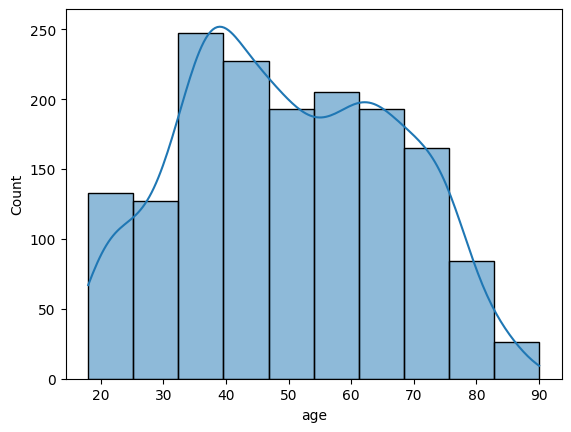

In [ ]:
sns.histplot(df['age'], bins = 10, kde = True, palette = 'salmon')

In [ ]:
df.columns

Index(['sex', 'age', 'federal_district', 'type_of_city', 'knows_election_date',
       'will_vote', 'candidate', 'television_usage', 'internet_usage',
       'education', 'income', 'employment', 'job_type', 'company_type',
       'weight1'],
      dtype='object')

<Axes: xlabel='sex', ylabel='count'>

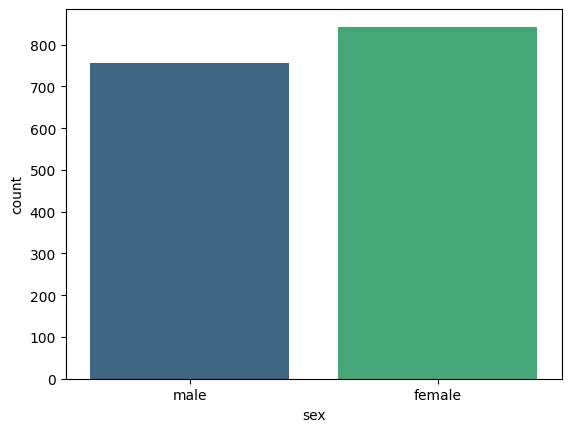

In [ ]:
sns.countplot(x = 'sex', data = df, palette = 'viridis')

<Axes: xlabel='count', ylabel='will_vote'>

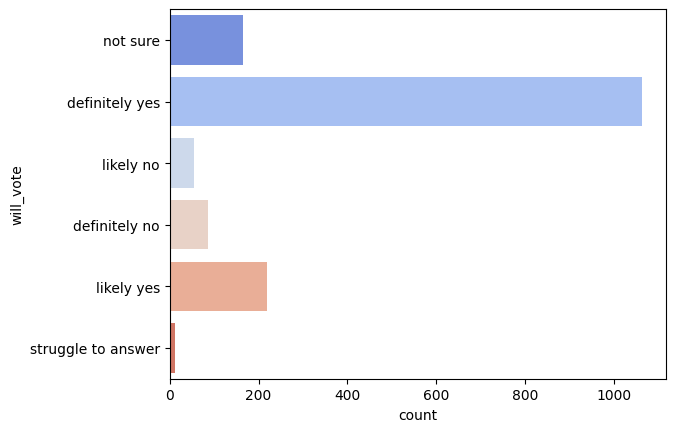

In [ ]:
sns.countplot(df.will_vote, palette = 'coolwarm')

definitely yes is most value


In [ ]:
df.head()

,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,job_type,company_type,weight1
0,male,18.0,north caucasian,village,named correct date,not sure,Putin,several times a week,over 4 hours a day,incomplete school education,very high,entrepreneur,commercial organization,farming,1.445172
1,male,23.0,north caucasian,village,named correct date,not sure,Putin,once half a year,over 4 hours a day,college,very high,work for hire,commercial organization,trade,1.445172
2,male,20.0,volga,city with population of less than 50k,named correct date,definitely yes,Putin,several times a week,over 4 hours a day,college,very high,work for hire,law enforcement agency,law enforcement agency,1.301691
3,male,22.0,northwestern,city with population of 1 million and higher,not sure or no answer,not sure,Davankov,several times a week,over 4 hours a day,college,very high,unemployed,commercial organization,"industry, manufacturing",1.538628
4,male,21.0,southern,city with population of 1 million and higher,named correct date,definitely yes,Putin,does not watch,over 4 hours a day,bachelor degree,very high,employed student,commercial organization,"tech, programming, communications",1.967015


In [ ]:
df.sex

,sex
0,male
1,male
2,male
3,male
4,male
...,...
1595,male
1596,female
1597,female
1598,female


male = 1
female = 0

In [ ]:
df['sex'].replace(to_replace = {'male':1, 'female': 0},inplace = True)

In [ ]:
df.sex

,sex
0,1
1,1
2,1
3,1
4,1
...,...
1595,1
1596,0
1597,0
1598,0


In [ ]:
df.sex =df.sex.astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sex                  1600 non-null   int64  
 1   age                  1600 non-null   float64
 2   federal_district     1600 non-null   object 
 3   type_of_city         1600 non-null   object 
 4   knows_election_date  1600 non-null   object 
 5   will_vote            1600 non-null   object 
 6   candidate            1600 non-null   object 
 7   television_usage     1600 non-null   object 
 8   internet_usage       1600 non-null   object 
 9   education            1600 non-null   object 
 10  income               1600 non-null   object 
 11  employment           1600 non-null   object 
 12  job_type             1600 non-null   object 
 13  company_type         1600 non-null   object 
 14  weight1              1600 non-null   float64
dtypes: float64(2), int64(1), object(12)
me

<Axes: xlabel='education', ylabel='count'>

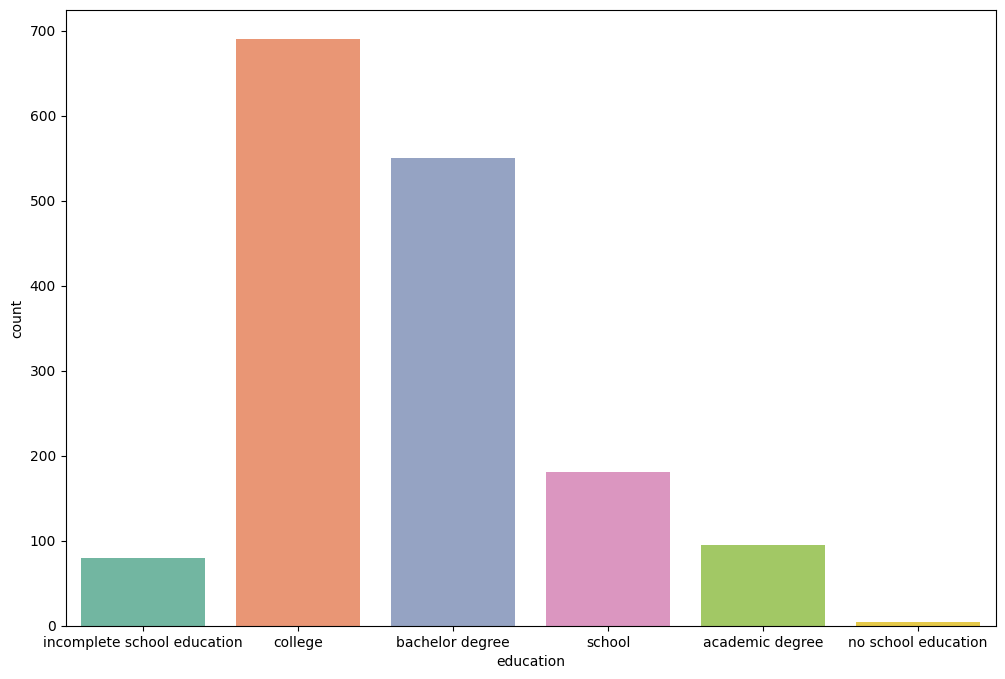

In [ ]:
plt.figure(figsize = (12,8))
sns.countplot(x = 'education',data=df , palette = 'Set2')


In [ ]:
df.columns

Index(['sex', 'age', 'federal_district', 'type_of_city', 'knows_election_date',
       'will_vote', 'candidate', 'television_usage', 'internet_usage',
       'education', 'income', 'employment', 'job_type', 'company_type',
       'weight1'],
      dtype='object')

In [ ]:
df['candidate'].unique()

array(['Putin', 'Davankov', 'will not take part', 'spoilt vote',
       'Kharitonov', 'struggle to answer', 'Slutskiy'], dtype=object)

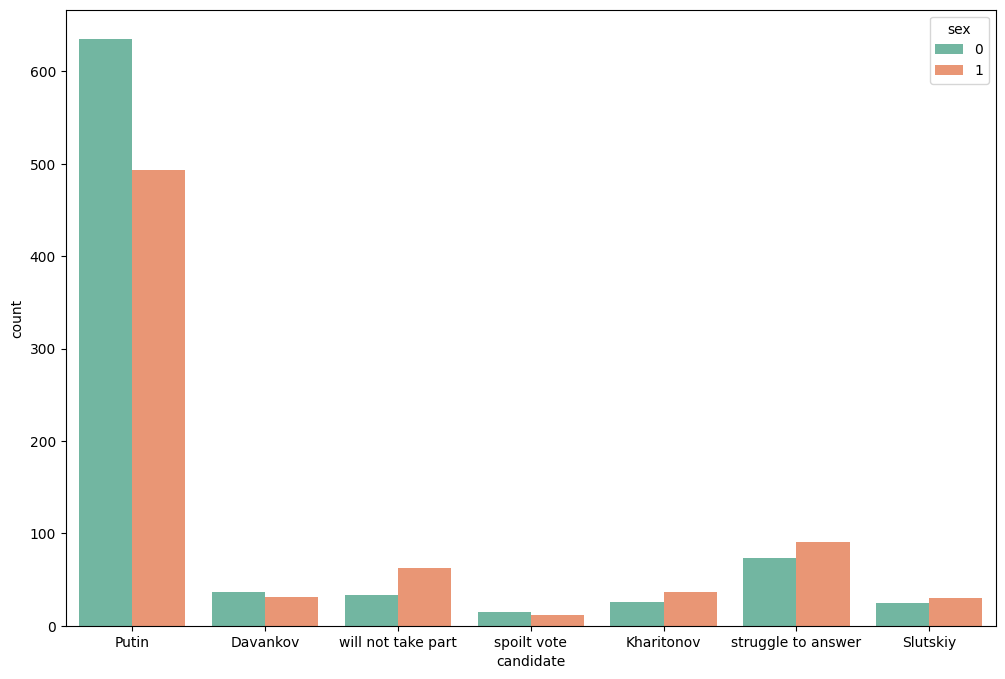

In [ ]:
plt.figure(figsize = (12,8))
sns.countplot(x = 'candidate',data=df, hue = 'sex', palette = 'Set2')
plt.show()

most of the candidate **putin**
and most of the candidates is female

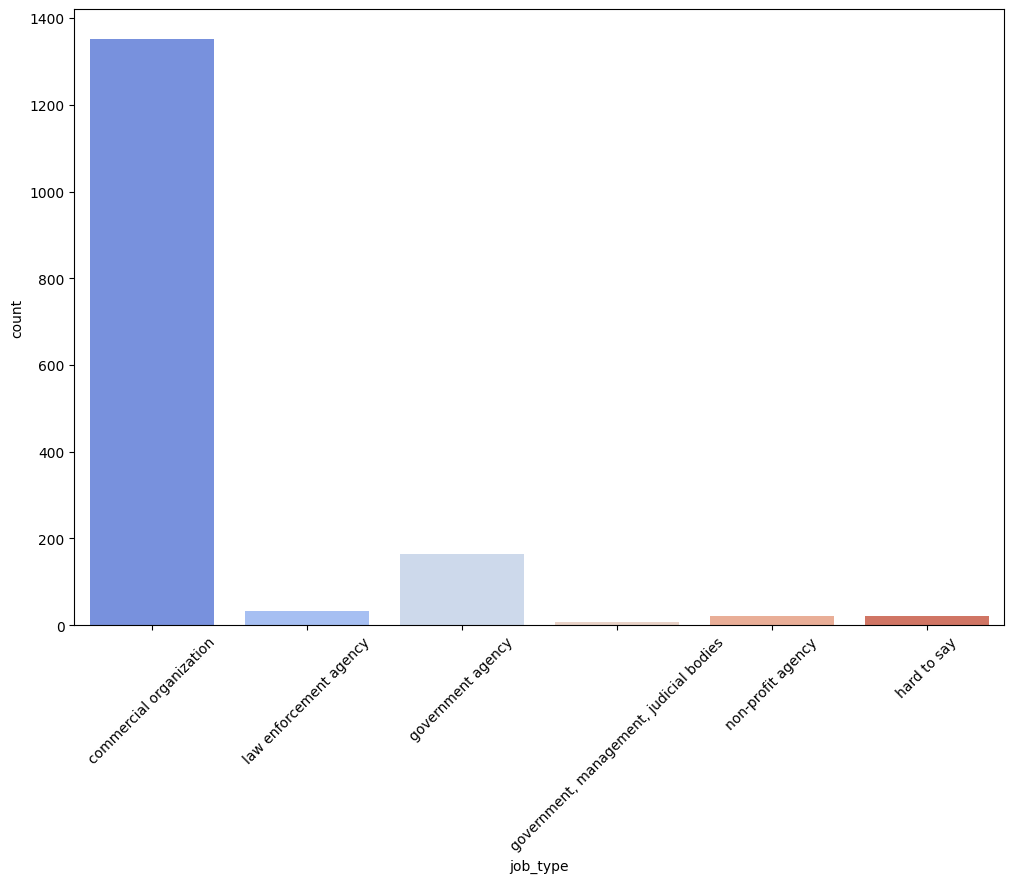

In [ ]:
plt.figure(figsize = (12,8))
sns.countplot(x = 'job_type', data =df, palette = 'coolwarm' )
plt.xticks(rotation = 45)
plt.show()

In [ ]:
df.head()

,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,job_type,company_type,weight1
0,1,18.0,north caucasian,village,named correct date,not sure,Putin,several times a week,over 4 hours a day,incomplete school education,very high,entrepreneur,commercial organization,farming,1.445172
1,1,23.0,north caucasian,village,named correct date,not sure,Putin,once half a year,over 4 hours a day,college,very high,work for hire,commercial organization,trade,1.445172
2,1,20.0,volga,city with population of less than 50k,named correct date,definitely yes,Putin,several times a week,over 4 hours a day,college,very high,work for hire,law enforcement agency,law enforcement agency,1.301691
3,1,22.0,northwestern,city with population of 1 million and higher,not sure or no answer,not sure,Davankov,several times a week,over 4 hours a day,college,very high,unemployed,commercial organization,"industry, manufacturing",1.538628
4,1,21.0,southern,city with population of 1 million and higher,named correct date,definitely yes,Putin,does not watch,over 4 hours a day,bachelor degree,very high,employed student,commercial organization,"tech, programming, communications",1.967015


In [ ]:
df['internet_usage'].unique()

array(['over 4 hours a day', 'less than 4 hours a day',
       'several times a week', 'does not use internet',
       'several times a month', 'once half a year'], dtype=object)

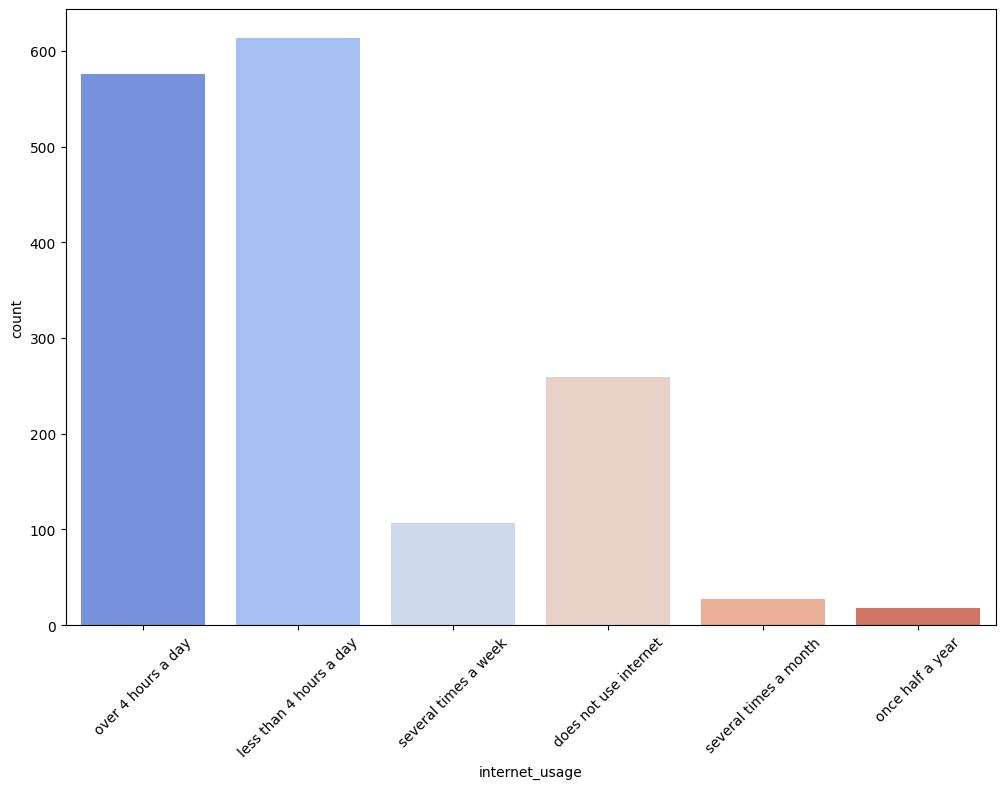

In [ ]:
plt.figure(figsize = (12,8))
sns.countplot(x = 'internet_usage', data =df, palette = 'coolwarm' )
plt.xticks(rotation = 45)
plt.show()

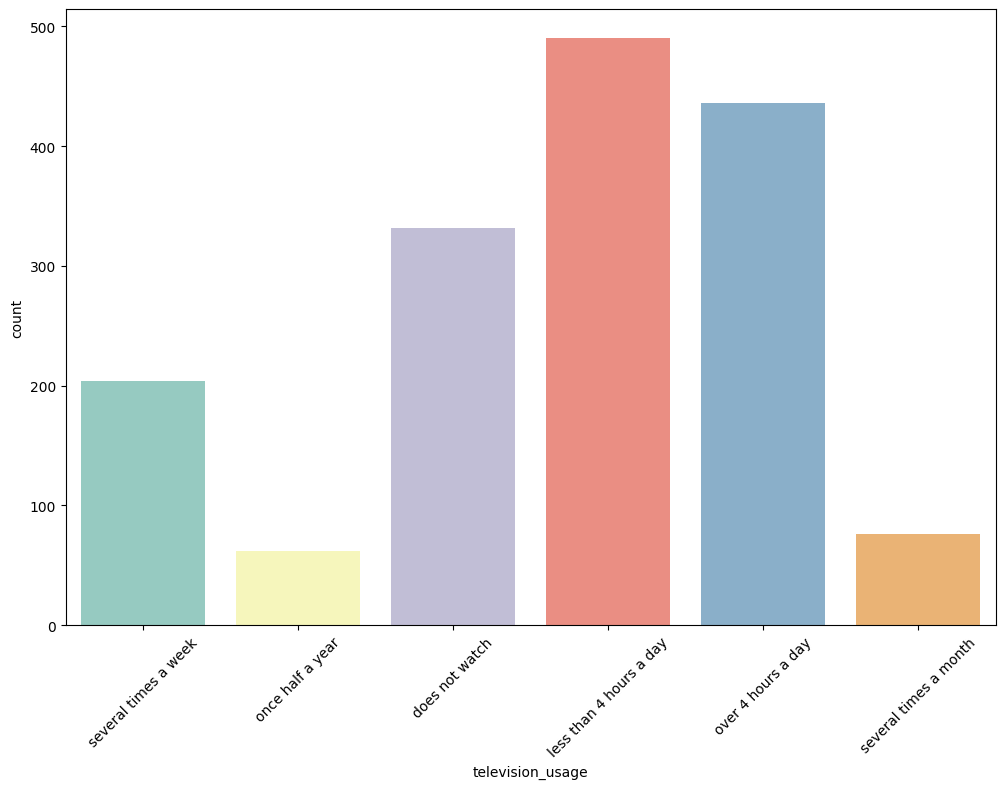

In [ ]:
plt.figure(figsize = (12,8))
sns.countplot(x = 'television_usage', data =df, palette = 'Set3' )
plt.xticks(rotation = 45)
plt.show()

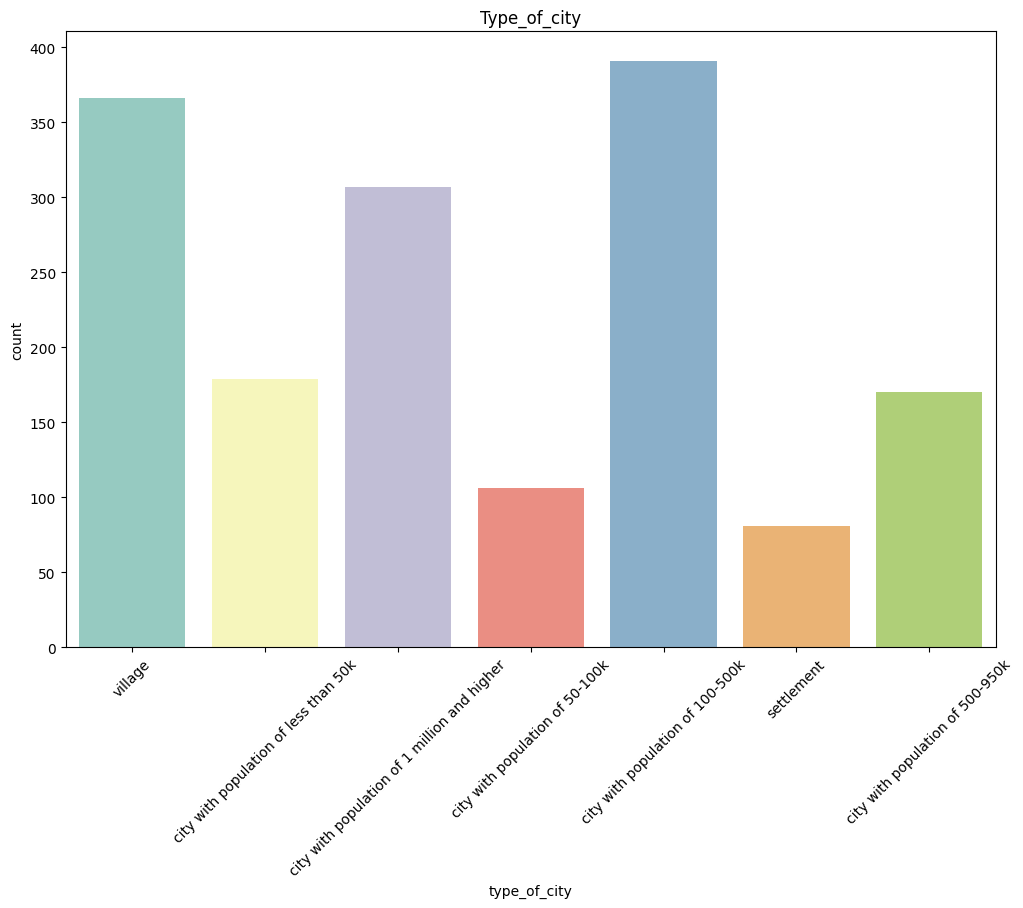

In [ ]:
plt.figure(figsize = (12,8))
sns.countplot(x = 'type_of_city', data =df, palette = 'Set3' )
plt.title('Type_of_city')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
df.head()

,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,job_type,company_type,weight1
0,1,18.0,north caucasian,village,named correct date,not sure,Putin,several times a week,over 4 hours a day,incomplete school education,very high,entrepreneur,commercial organization,farming,1.445172
1,1,23.0,north caucasian,village,named correct date,not sure,Putin,once half a year,over 4 hours a day,college,very high,work for hire,commercial organization,trade,1.445172
2,1,20.0,volga,city with population of less than 50k,named correct date,definitely yes,Putin,several times a week,over 4 hours a day,college,very high,work for hire,law enforcement agency,law enforcement agency,1.301691
3,1,22.0,northwestern,city with population of 1 million and higher,not sure or no answer,not sure,Davankov,several times a week,over 4 hours a day,college,very high,unemployed,commercial organization,"industry, manufacturing",1.538628
4,1,21.0,southern,city with population of 1 million and higher,named correct date,definitely yes,Putin,does not watch,over 4 hours a day,bachelor degree,very high,employed student,commercial organization,"tech, programming, communications",1.967015


# E-coding

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
df2 = df.copy()

In [ ]:
df2

,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,job_type,company_type,weight1
0,1,18.0,north caucasian,village,named correct date,not sure,Putin,several times a week,over 4 hours a day,incomplete school education,very high,entrepreneur,commercial organization,farming,1.445172
1,1,23.0,north caucasian,village,named correct date,not sure,Putin,once half a year,over 4 hours a day,college,very high,work for hire,commercial organization,trade,1.445172
2,1,20.0,volga,city with population of less than 50k,named correct date,definitely yes,Putin,several times a week,over 4 hours a day,college,very high,work for hire,law enforcement agency,law enforcement agency,1.301691
3,1,22.0,northwestern,city with population of 1 million and higher,not sure or no answer,not sure,Davankov,several times a week,over 4 hours a day,college,very high,unemployed,commercial organization,"industry, manufacturing",1.538628
4,1,21.0,southern,city with population of 1 million and higher,named correct date,definitely yes,Putin,does not watch,over 4 hours a day,bachelor degree,very high,employed student,commercial organization,"tech, programming, communications",1.967015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,1,61.0,central,settlement,named correct date,definitely no,will not take part,over 4 hours a day,less than 4 hours a day,bachelor degree,hard to say,unemployed pensioner,commercial organization,"industry, manufacturing",1.270761
1596,0,80.0,volga,village,named correct date,likely yes,struggle to answer,several times a week,does not use internet,college,hard to say,unemployed pensioner,commercial organization,"industry, manufacturing",0.921724
1597,0,76.0,northwestern,city with population of 50-100k,named correct date,definitely yes,Putin,does not watch,over 4 hours a day,bachelor degree,hard to say,unemployed pensioner,commercial organization,"industry, manufacturing",1.396691
1598,0,74.0,central,city with population of less than 50k,not sure or no answer,definitely yes,Putin,over 4 hours a day,over 4 hours a day,academic degree,hard to say,employed pensioner,commercial organization,"industry, manufacturing",0.995849


In [ ]:
label_encoding_cols = ['sex', 'will_vote']

# List of columns to apply One-Hot Encoding
one_hot_encoding_cols = ['federal_district', 'type_of_city', 'knows_election_date',
                         'candidate', 'television_usage', 'education',
                         'employment', 'job_type', 'company_type']

# Apply Label Encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in label_encoding_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Apply One-Hot Encoding
df = pd.get_dummies(df, columns=one_hot_encoding_cols)

In [ ]:
df

,sex,age,will_vote,internet_usage,income,weight1,federal_district_central,federal_district_far eastern,federal_district_north caucasian,federal_district_northwestern,...,company_type_law enforcement agency,company_type_media,company_type_other,company_type_refused to answer,company_type_social services,company_type_state administration,"company_type_tech, programming, communications",company_type_trade,"company_type_transportation, storage","company_type_Сфера услуг, сервиса, бытового обслуживания Включает в том числе: Прачечная/химчистка, ремонт мебели, часов, ювелирны..."
0,1,18.0,4,over 4 hours a day,very high,1.445172,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,1,23.0,4,over 4 hours a day,very high,1.445172,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
2,1,20.0,1,over 4 hours a day,very high,1.301691,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,1,22.0,4,over 4 hours a day,very high,1.538628,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,1,21.0,1,over 4 hours a day,very high,1.967015,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,1,61.0,0,less than 4 hours a day,hard to say,1.270761,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1596,0,80.0,3,does not use internet,hard to say,0.921724,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1597,0,76.0,1,over 4 hours a day,hard to say,1.396691,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1598,0,74.0,1,over 4 hours a day,hard to say,0.995849,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
